## 🍄**Mushroom Classification**

- Inspired from : Satya
- Kaggle Link : https://www.kaggle.com/code/satyaprakashshukl/mushroom-classification-analysis

### *Font Configuration

In [ ]:
%%HTML
<style>
    body {
        --vscode-font-family: "Consolas"
    }
</style>

![alt text](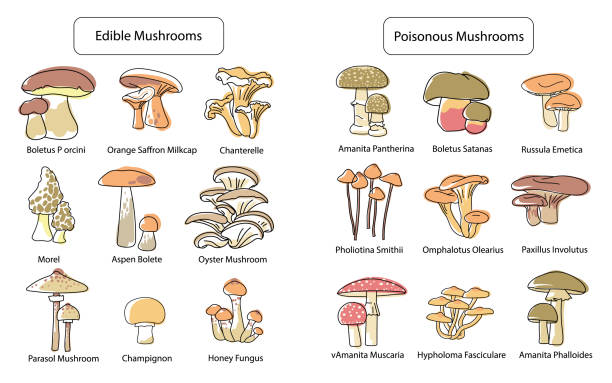 "Online Class Memes")

### Goals

* **Task** : To develop a model that classify mushrooms as edible ('e') or poisonous ('p') using a set of physical attributes provided in the dataset.

* **Dataset** : Training Dataset (train.csv): Contains features along with the target variable, indicating whether each mushroom is edible or poisonous.Test Dataset (test.csv): Contains the features but requires predictions for whether the mushrooms are edible or poisonous.Additional Information:

* **Evaluation** : The performance of the model is evaluated using the Matthews correlation coefficient (MCC), a metric that balances true and false positives and negatives, providing a measure of the quality of binary classifications.

* The dataset was generated from a deep learning model trained on the UCI Mushroom dataset.


### Libraries Dependencies 

In [ ]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

### Data Acquition

In [ ]:
train_df = pd.read_csv('../../../Mushroom/input/train.csv')
test_df  = pd.read_csv('../../../Mushroom/input/test.csv')
combine  = [train_df, test_df]

### Explore the Data!

In [ ]:
# Check few data (for first 5 data)
train_df.head()

In [ ]:
# Check few data (for last 5 data)
train_df.tail()

##### Observations
- It has 22 Columns

In [ ]:
# Check features names (read the data documentation for description)
print(train_df.columns.values)

In [ ]:
# Sum non-null/non-empty values & type
train_df.info()

In [ ]:
# distribution of numerical features 
train_df.describe()

In [ ]:
# distribution of categorical features 
train_df.describe(include=['O'])

In [ ]:
test_df.shape, train_df.shape

### Data Manipulation!

In [ ]:
#  Delete non-relevant feature
train_df = train_df.drop(columns=['id'])
test_df  = test_df.drop(columns=['id'])

### Exploratory Data Analysis!

In [ ]:
# Get percentage of missing values every columns
missing_train = train_df.isna().mean() * 100
missing_test = test_df.isna().mean() * 100

print("Columns in train with mode than 10% missing values : ")
print(missing_train[missing_train > 10])

print("===========================")
print("Columns in test with mode than 10% missing values : ")
print(missing_test[missing_test > 10])

##### Age X Survival : Observations
- Common Columns : Both Train & Test Data share the same columns with more than 10% missing value
- High Missing Values : The columns stem-root, veil-type, veil-color, and spore-print-color have a very high percentage of missing values (more than 80%)
- Moderate Missing Values : The columns cap-surface, gill-attachment, gill-spacing, and stem-surface have moderate missing values, ranging from approximately 16% to 63%.

### Data Visualization!

In [ ]:
missing_values = train_df.isnull().mean() * 100
missing_values = missing_values[missing_values > 0]
missing_values = missing_values.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Percentage of Missing Values')
plt.title('Missing Values Distribution in df_train')
plt.show()

##### Template : Observations Example
- Fact 1 : Infants (Age <=4) had high survival rate.
- Fact 2 : Oldest passengers (Age = 80) survived.
- Fact 3 : Large number of 15-25 year olds did not survive.
- Fact 4 : Most passengers are in 15-35 age range.